In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

#### _Завантаження .CSV файлу з переліком 10979 квартир, доступних для оренди в м. Києві_

In [2]:
df = pd.read_csv('appartments_550_pages.csv')
df.head()

,Price,District,Residential_complex,Square,Level_of_housing,Distance_to_Metro
0,6999.0,8.0,0,45.0,1,3
1,21936.0,NaN,1,90.0,1,3
2,13000.0,1.0,0,48.0,1,1
3,73120.0,1.0,1,121.0,1,1
4,18000.0,8.0,0,87.0,1,2


#### _Визначення типу даних в атрибутах_

In [3]:
df.dtypes

Price                  float64
District               float64
Residential_complex      int64
Square                 float64
Level_of_housing         int64
Distance_to_Metro        int64
dtype: object

#### _Підрахунок кількості значень NaN у вибірці з 10979 квартир_

In [4]:
df.isna().sum()

Price                    0
District               357
Residential_complex      0
Square                   0
Level_of_housing         0
Distance_to_Metro        0
dtype: int64


#### _Усунення відповідних рядків із   NaN у вибірці з 10979 квартир_

In [5]:
df = df.dropna()
df.isna().sum()

Price                  0
District               0
Residential_complex    0
Square                 0
Level_of_housing       0
Distance_to_Metro      0
dtype: int64

#### _Візуалізація залежности 'Price' від 'District' у вибірці з 10622 квартир_

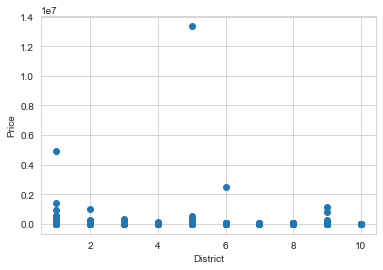

In [6]:
plt.scatter(df.District, df.Price)
plt.xlabel('District')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Residential complex' у вибірці з 10622 квартир_

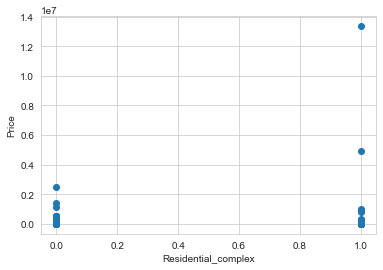

In [7]:
plt.scatter(df.Residential_complex, df.Price)
plt.xlabel('Residential_complex')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Level_of_housing' у вибірці з 10622 квартир_

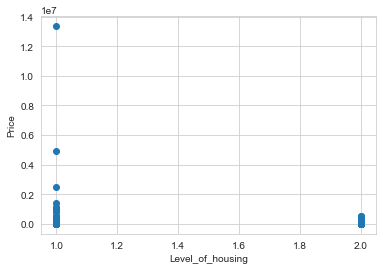

In [8]:
plt.scatter(df.Level_of_housing, df.Price)
plt.xlabel('Level_of_housing')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Distance_to_Metro' у вибірці з 10622 квартир_

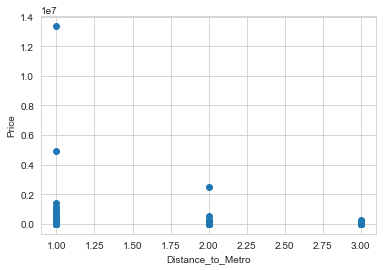

In [9]:
plt.scatter(df.Distance_to_Metro, df.Price)
plt.xlabel('Distance_to_Metro')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Square' у вибірці з 10622 квартир_

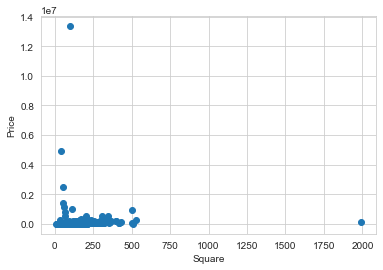

In [10]:
plt.scatter(df.Square, df.Price)
plt.xlabel('Square')
plt.ylabel('Price')
plt.show()

#### _Створення окремих data frames для залежної змінної і однієї пояснювальної змінної, яка найбільше пасує наближенню лінійною регресією з відповідним навчанням згаданої моделі_

In [11]:
Y = df['Price']
X = df[['Square']]
X = sm.add_constant(X)
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

/Users/serhiimykhalkiv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.96e-37
Time:                        15:02:50   Log-Likelihood:            -1.4109e+05
No. Observations:               10617   AIC:                         2.822e+05
Df Residuals:                   10615   BIC:                         2.822e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4900.6961   2550.762     -1.921      0.055   -9900.668      99.275
Square       420.6527     32.772     12.836      0.000     356.414     484.892
==============================================================================
Omnibus:                    39377.752   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      22982557212.681
Skew:                          80.461   Prob(JB):                         0.00
Kurtosis:                    7209.023   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### _Створення окремих data frames для залежної змінної та всіх пояснювальних змінних із наступним навчанням моделі множинної регресії_

In [12]:
Y = df['Price']
X = df[['Square', 'District', 'Residential_complex', 'Level_of_housing', 'Distance_to_Metro']]
X = sm.add_constant(X)
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

/Users/serhiimykhalkiv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     42.34
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           2.45e-43
Time:                        15:02:52   Log-Likelihood:            -1.4107e+05
No. Observations:               10617   AIC:                         2.822e+05
Df Residuals:                   10611   BIC:                         2.822e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4868.0780   8308.441      0.586      0.558   -1.14e+04    2.12e+04
Square                386.9486     33.551     11.533      0.000     321.182     452.715
District             -996.7191    513.830     -1.940      0.052   -2003.922      10.484
Residential_complex  1.784e+04   3414.515      5.226      0.000    1.12e+04    2.45e+04
Level_of_housing     -389.1360   6739.074     -0.058      0.954   -1.36e+04    1.28e+04
Distance_to_Metro   -3792.3177   1816.050     -2.088      0.037   -7352.116    -232.519
==============================================================================
Omnibus:                    39413.278   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      23165571015.430
Skew:                          80.683   Prob(JB):                         0.00
Kurtosis:                    7237.661   Cond. No.                         579.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### _Завантаження .CSV файлу з переліком 340 квартир, доступних для оренди в м. Києві_

In [13]:
df = pd.read_csv('appartments_1_18_pages.csv')
df.head()

,Price,District,Residential_complex,Square,Level_of_housing,Distance_to_Metro
0,6999.0,8.0,0,45.0,1,3
1,21936.0,NaN,1,90.0,1,3
2,13000.0,1.0,0,48.0,1,1
3,73120.0,1.0,1,121.0,1,1
4,18000.0,8.0,0,87.0,1,2


#### _Підрахунок кількості значень NaN у вибірці з 340 квартир_

In [14]:
df.isna().sum()

Price                  0
District               5
Residential_complex    0
Square                 0
Level_of_housing       0
Distance_to_Metro      0
dtype: int64

#### _Усунення відповідних рядків із   NaN у вибірці з 340 квартир_

In [15]:
df = df.dropna()
df.isna().sum()

Price                  0
District               0
Residential_complex    0
Square                 0
Level_of_housing       0
Distance_to_Metro      0
dtype: int64

#### _Візуалізація залежности 'Price' від 'District' у вибірці з 335 квартир_

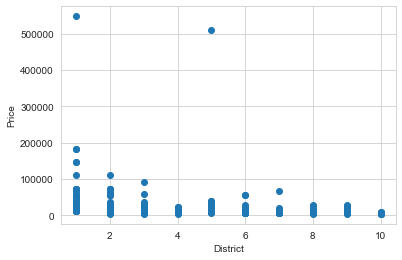

In [16]:
plt.scatter(df.District, df.Price)
plt.xlabel('District')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Residential complex' у вибірці з 335 квартир_

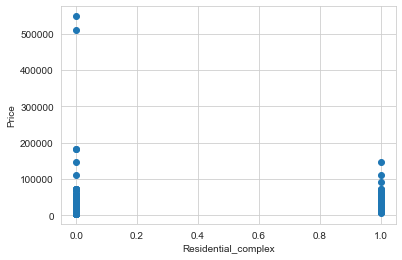

In [17]:
plt.scatter(df.Residential_complex, df.Price)
plt.xlabel('Residential_complex')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Level_of_housing' у вибірці з 335 квартир_

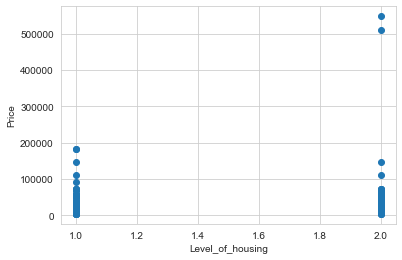

In [18]:
plt.scatter(df.Level_of_housing, df.Price)
plt.xlabel('Level_of_housing')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Distance_to_Metro' у вибірці з 335 квартир_

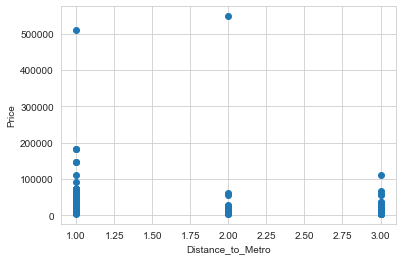

In [19]:
plt.scatter(df.Distance_to_Metro, df.Price)
plt.xlabel('Distance_to_Metro')
plt.ylabel('Price')
plt.show()

#### _Візуалізація залежности 'Price' від 'Square' у вибірці з 335 квартир_

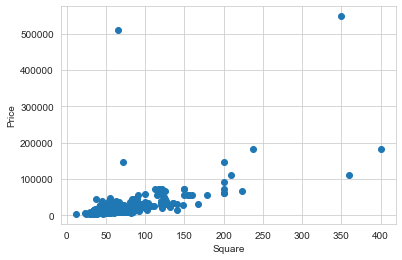

In [20]:
plt.scatter(df.Square, df.Price)
plt.xlabel('Square')
plt.ylabel('Price')
plt.show()

#### _Створення окремих data frames для залежної змінної і однієї пояснювальної змінної, яка найбільше пасує наближенню лінійною регресією з відповідним навчанням згаданої моделі_

In [21]:
Y = df['Price']
X = df[['Square']]
X = sm.add_constant(X)
ks = sm.OLS(Y, X)
ks_res = ks.fit()
ks_res.summary()

/Users/serhiimykhalkiv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     168.7
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.75e-31
Time:                        15:03:11   Log-Likelihood:                -3999.6
No. Observations:                 335   AIC:                             8003.
Df Residuals:                     333   BIC:                             8011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.45e+04   3658.968     -3.962      0.000   -2.17e+04   -7298.068
Square       562.1053     43.282     12.987      0.000     476.965     647.245
==============================================================================
Omnibus:                      576.898   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           196916.134
Skew:                           9.821   Prob(JB):                         0.00
Kurtosis:                     120.139   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### _Створення окремих data frames для залежної змінної та всіх пояснювальних змінних із наступним навчанням моделі множинної регресії_

In [22]:
Y = df['Price']
X = df[['Square', 'District', 'Residential_complex', 'Level_of_housing', 'Distance_to_Metro']]
X = sm.add_constant(X)
ks = sm.OLS(Y, X)
ks_res = ks.fit()
ks_res.summary()

/Users/serhiimykhalkiv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     35.52
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           4.91e-29
Time:                        15:03:14   Log-Likelihood:                -3995.9
No. Observations:                 335   AIC:                             8004.
Df Residuals:                     329   BIC:                             8027.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.741e+04   9040.304     -1.926      0.055   -3.52e+04     373.474
Square                545.2508     45.073     12.097      0.000     456.583     633.919
District             -829.2499    775.952     -1.069      0.286   -2355.703     697.204
Residential_complex  4989.7987   4437.212      1.125      0.262   -3739.087    1.37e+04
Level_of_housing     6476.4670   4053.562      1.598      0.111   -1497.703    1.45e+04
Distance_to_Metro   -2118.7553   2535.871     -0.836      0.404   -7107.323    2869.812
==============================================================================
Omnibus:                      583.509   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           208716.807
Skew:                          10.036   Prob(JB):                         0.00
Kurtosis:                     123.623   Cond. No.                         401.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### _Розрахунок та візуалізація стандартизованих залишків моделі_

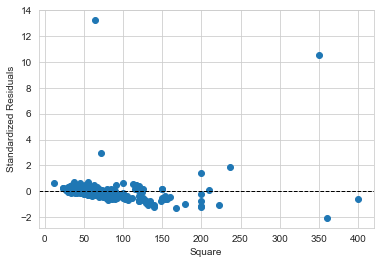

In [28]:
influence = ks_res.get_influence()
standardized_residuals = influence.resid_studentized_internal
plt.scatter(df.Square, standardized_residuals)
plt.xlabel('Square')
plt.ylabel('Standardized Residuals')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

#### _Визначення індексів рядків, стандартизований залишок яких більше 3_

In [30]:
for k in range(len(standardized_residuals)):
    if standardized_residuals[k] > abs(3):
        print(k)

159
256


#### _Візуалізація залежности 'Price' від 'Square' у вибірці з 333 квартир після видалення двох рядків стандартизований залишок яких був поза нормою_

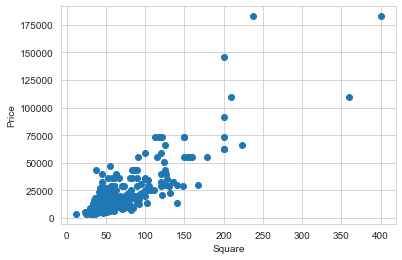

In [31]:
df = pd.read_csv('appartments_1_18_pages_no_NaN_no_3.csv')
plt.scatter(df.Square, df.Price)
plt.xlabel('Square')
plt.ylabel('Price')
plt.show()

#### _Розрахунок точності отриманої лінійної моделі за однією уточнювальною змінною 'Square' після згаданих корегувань_

In [32]:
Y = df['Price']
X = df[['Square']]
X = sm.add_constant(X)
ks = sm.OLS(Y, X)
ks_res = ks.fit()
ks_res.summary()

/Users/serhiimykhalkiv/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     684.6
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.76e-82
Time:                        15:37:30   Log-Likelihood:                -3607.0
No. Observations:                 332   AIC:                             7218.
Df Residuals:                     330   BIC:                             7226.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6800.6916   1290.604     -5.269      0.000   -9339.541   -4261.842
Square       409.0725     15.635     26.164      0.000     378.316     439.829
==============================================================================
Omnibus:                      175.740   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1873.266
Skew:                           1.945   Prob(JB):                         0.00
Kurtosis:                      13.967   Cond. No.                         153.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### _Розрахунок точності отриманої множинної моделі за всіма уточнювальними змінними після згаданих корегувань_

In [34]:
Y = df['Price']
X = df[['Square', 'District', 'Residential_complex', 'Level_of_housing', 'Distance_to_Metro']]
X = sm.add_constant(X)
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     179.9
Date:                Wed, 03 Aug 2022   Prob (F-statistic):           1.76e-91
Time:                        15:40:01   Log-Likelihood:                -3573.6
No. Observations:                 332   AIC:                             7159.
Df Residuals:                     326   BIC:                             7182.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 237.0732   2868.116      0.083      0.934   -5405.278    5879.424
Square                388.0538     14.880     26.078      0.000     358.780     417.328
District             -991.0803    242.462     -4.088      0.000   -1468.067    -514.094
Residential_complex  7149.8186   1389.497      5.146      0.000    4416.305    9883.332
Level_of_housing     -261.1699   1272.567     -0.205      0.838   -2764.649    2242.309
Distance_to_Metro   -1997.1110    795.103     -2.512      0.012   -3561.291    -432.931
==============================================================================
Omnibus:                      231.225   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4622.749
Skew:                           2.566   Prob(JB):                         0.00
Kurtosis:                      20.546   Cond. No.                         396.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Загальні рекомендації замовникові
Для прогнозування з точністю _**0.73**_ шуканих параметрів квартири  cлід обирати такий діапазон пояснювальних змінних:
* змінна 'Square' має перебувати в межах 12 - 400 $м^2$;
* змінна 'Price' має перебувати в межах 3700 - 182800 грн;
* решту уточнувальних змінних лишити без змін